In [83]:
import pandas as pd
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from sklearn.manifold import TSNE
from src.load_data import *
from src.graph_data import *
from src.utils import *

In [84]:
article_df = feather.read_feather('Data/dataframes/article_dataframe_embedding_distance.feather')
article_df

,article,article_unrendered_unicode,category,linkSource,linkTarget,distances,plain_text,incoming_links,num_hyperlinks,num_characters,hyperlink_density,embeddings,average_outgoing_article_title_cosine_distance
0,Áedán_mac_Gabráin,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,[subject.History.British_History.British_Histo...,Áedán_mac_Gabráin,"[Bede, Columba, Dál_Riata, Great_Britain, Irel...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÁedán mac Gabráin\n\n2007 Sch...,0,11,11612,0.000947,"[-0.1292391121387481, 0.0236219353973865, -0.0...",0.785123
1,Åland,%C3%85land,"[subject.Countries, subject.Geography.European...",Åland,"[20th_century, Baltic_Sea, Crimean_War, Curren...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÅland\n\n2007 Schools Wikiped...,0,19,17238,0.001102,"[-0.0536498501896858, -0.018478475511074, -0.0...",0.790986
2,Édouard_Manet,%C3%89douard_Manet,[subject.People.Artists],Édouard_Manet,"[Absinthe, Beer, Claude_Monet, Diego_Velázquez...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉdouard Manet\n\n2007 Schools...,0,20,18996,0.001053,"[-0.0170925538986921, 0.0835338979959487, -0.0...",0.758071
3,Éire,%C3%89ire,"[subject.Countries, subject.Geography.European...",Éire,"[Canada, English_language, George_VI_of_the_Un...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nÉire\n\n2007 Schools Wikipedi...,0,8,13083,0.000611,"[0.0483395084738731, 0.0465945191681385, 0.052...",0.697083
4,Óengus_I_of_the_Picts,%C3%93engus_I_of_the_Picts,[subject.History.British_History.British_Histo...,Óengus_I_of_the_Picts,"[Dál_Riata, Durham, England, Great_Britain, Ir...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nÓengus I of the Picts\n\n2007...,0,10,12944,0.000773,"[-0.076491080224514, 0.1048120632767677, -0.04...",0.823469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,Zionism,Zionism,"[subject.People.Political_People, subject.Reli...",Zionism,"[18th_century, 19th_century, Adolf_Hitler, Alb...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZionism\n\n2007 Schools Wikip...,25,74,62086,0.001192,"[-0.0160204768180847, 0.0894060954451561, -0.0...",0.692210
4600,Zirconium,Zirconium,[subject.Science.Chemistry.Chemical_elements],Zirconium,"[Aluminium, Arabic_language, Australia, Bicycl...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZirconium\n\n2007 Schools Wik...,15,42,13253,0.003169,"[-0.1054912209510803, 0.0234880838543176, -0.1...",0.719828
4601,Zoroaster,Zoroaster,[subject.People.Religious_figures_and_leaders],Zoroaster,"[18th_century, 9th_century, Afghanistan, Age_o...","{'10th_century': 2.0, '11th_century': 2.0, '12...",#copyright\n\nZoroaster\n\n2007 Schools Wik...,9,28,19726,0.001419,"[-0.0665727406740188, 0.1222779899835586, -0.0...",0.783683
4602,Zuid-Gelders,Zuid-Gelders,"[subject.Geography.European_Geography, subject...",Zuid-Gelders,"[Brabantian, Dutch_language, East_Flemish, Hol...","{'10th_century': 3.0, '11th_century': 3.0, '12...",#copyright\n\nZuid-Gelders\n\n2007 Schools ...,5,5,2341,0.002136,"[-0.173138827085495, 0.0952244028449058, 0.006...",0.833498


another feature that can be implemented is vocabulary richness.

In [85]:
import re
from collections import Counter


# Function to compute vocabulary richness
def compute_vocabulary_richness(text):
    # Tokenize the text (split into words)
    words = re.findall(r'\b\w+\b', text.lower())  # Lowercase and split on words
    total_words = len(words)
    unique_words = len(set(words))
    if total_words == 0:  # Avoid division by zero
        return 0
    return unique_words / total_words

# Apply the function to the DataFrame
article_df['vocabulary_richness'] = article_df['plain_text'].apply(compute_vocabulary_richness)


In [86]:
article_df.drop(columns=['plain_text','article_unrendered_unicode','category','linkSource','linkTarget','distances','embeddings'], inplace=True)
article_df.rename(columns={'average_outgoing_article_title_cosine_distance': 'cosine_distance'}, inplace=True)


In [87]:
article_df

,article,incoming_links,num_hyperlinks,num_characters,hyperlink_density,cosine_distance,vocabulary_richness
0,Áedán_mac_Gabráin,0,11,11612,0.000947,0.785123,0.318346
1,Åland,0,19,17238,0.001102,0.790986,0.376456
2,Édouard_Manet,0,20,18996,0.001053,0.758071,0.368298
3,Éire,0,8,13083,0.000611,0.697083,0.329540
4,Óengus_I_of_the_Picts,0,10,12944,0.000773,0.823469,0.333808
...,...,...,...,...,...,...,...
4599,Zionism,25,74,62086,0.001192,0.692210,0.247640
4600,Zirconium,15,42,13253,0.003169,0.719828,0.458779
4601,Zoroaster,9,28,19726,0.001419,0.783683,0.386653
4602,Zuid-Gelders,5,5,2341,0.002136,0.833498,0.488372


In [88]:
quality_scores_clicks_df = feather.read_feather('Data/dataframes/quality_scores_clicks.feather')
utility_scores_clicks_df = feather.read_feather('Data/dataframes/utility_scores_clicks.feather')
scores_speed_df = feather.read_feather('Data/dataframes/scores_speed.feather')

In [89]:
merged_quality_df = article_df.merge(quality_scores_clicks_df, on='article', how='inner')
merged_utility_df = article_df.merge(utility_scores_clicks_df, on='article', how='inner')
merged_speed_df = article_df.merge(scores_speed_df, on='article', how='inner')

In [90]:
merged_quality_df

,article,incoming_links,num_hyperlinks,num_characters,hyperlink_density,cosine_distance,vocabulary_richness,composite_3,composite_2,PCA_composite_2
0,12th_century,85,45,6639,0.006778,0.552546,0.542683,-0.260139,-0.363953,-0.431488
1,14th_century,71,31,5846,0.005303,0.642323,0.549539,-0.710676,-0.933304,-1.204720
2,15th_century,100,57,8631,0.006604,0.567696,0.485915,-0.520094,-0.336263,-0.463780
3,16th_century,125,91,13496,0.006743,0.634037,0.456978,-0.124367,-0.265598,-0.360494
4,17th_century,127,87,14040,0.006197,0.626604,0.458161,-0.336817,-0.465213,-0.821669
...,...,...,...,...,...,...,...,...,...,...
592,World_War_I,404,82,81563,0.001005,0.654659,0.243804,0.442880,0.438655,0.473121
593,World_War_II,751,119,101666,0.001170,0.676675,0.190506,1.098855,1.137761,1.484823
594,World_Wide_Web,21,20,23063,0.000867,0.693792,0.307097,0.669344,0.567715,0.769241
595,Yellowstone_National_Park,18,29,30425,0.000953,0.764845,0.305835,-2.143830,-2.205863,-3.358682


In [91]:
merged_quality_df_2 = merged_quality_df.copy()

We know have 3 dataframe with all article features aswell as the different composite scores computed in the scores.ipynb file. One with the quality scores, one withe the utility scores and one with the speed scores


## Evaluation of the quality scores


In [92]:
# Rank articles for each attribute and each score
merged_quality_df_2['rank_incoming_links'] = merged_quality_df_2['incoming_links'].rank(ascending=False)
merged_quality_df_2['rank_num_hyperlinks'] = merged_quality_df_2['num_hyperlinks'].rank(ascending=False)
merged_quality_df_2['rank_num_characters'] = merged_quality_df_2['num_characters'].rank(ascending=False)
merged_quality_df_2['rank_hyperlink_density'] = merged_quality_df_2['hyperlink_density'].rank(ascending=False)
merged_quality_df_2['rank_cosine_distance'] = merged_quality_df_2['cosine_distance'].rank(ascending=False)
merged_quality_df_2['rank_vocabulary_richness'] = merged_quality_df_2['vocabulary_richness'].rank(ascending=False)
merged_quality_df_2['rank_composite_3'] = merged_quality_df_2['composite_3'].rank(ascending=False)
merged_quality_df_2['rank_composite_2'] = merged_quality_df_2['composite_2'].rank(ascending=False)
merged_quality_df_2['rank_PCA_composite_2'] = merged_quality_df_2['PCA_composite_2'].rank(ascending=False)

Correlation between composite 3 score ranking and ranks of each metric:
rank_incoming_links         0.236887
rank_num_hyperlinks         0.332354
rank_num_characters         0.293467
rank_hyperlink_density      0.028558
rank_cosine_distance       -0.028311
rank_vocabulary_richness   -0.181528
dtype: float64
------------------------------------------------------------------------
Correlation between composite 2 score ranking and ranks of each metric:
rank_incoming_links         0.252724
rank_num_hyperlinks         0.352480
rank_num_characters         0.326369
rank_hyperlink_density      0.013497
rank_cosine_distance       -0.012781
rank_vocabulary_richness   -0.206747
dtype: float64
------------------------------------------------------------------------
Correlation between PCA composite 2 score ranking and ranks of each metric:
rank_incoming_links        -0.215123
rank_num_hyperlinks        -0.331454
rank_num_characters        -0.309501
rank_hyperlink_density     -0.005066
rank_cosine_

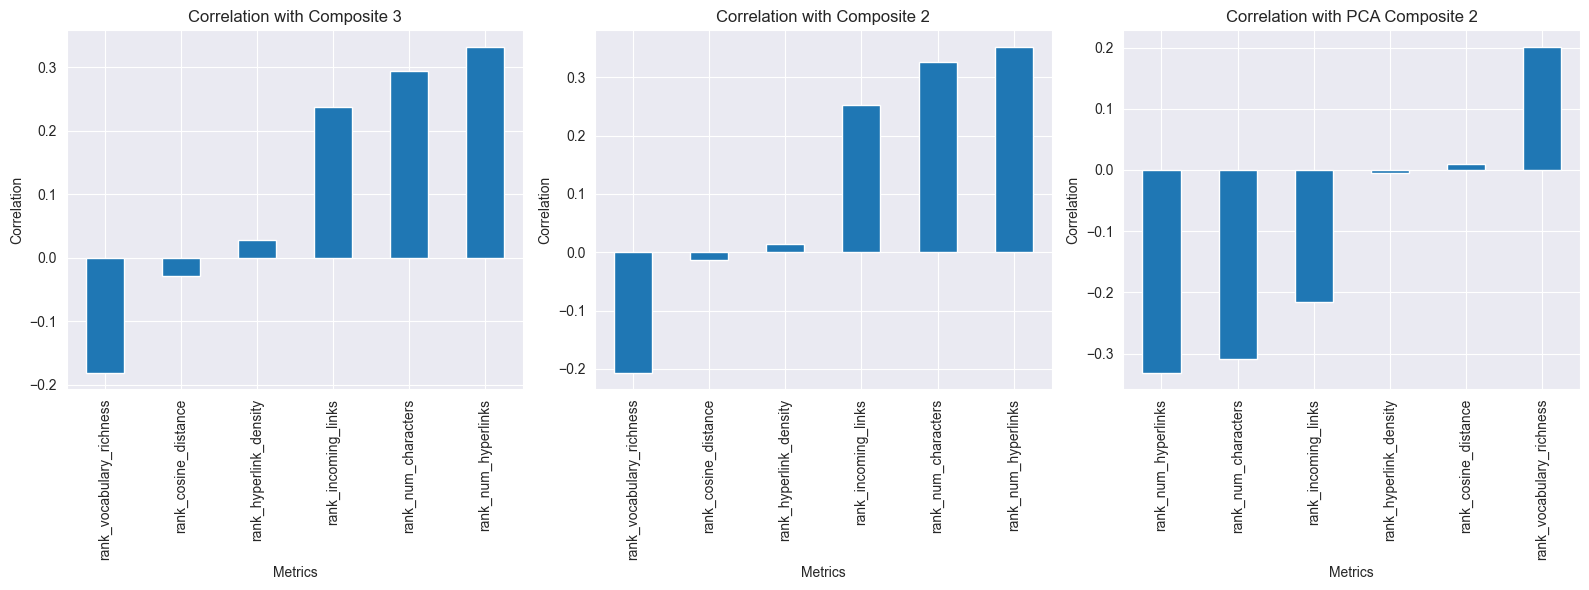

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute correlations for Composite 3
correlations_composite_3 = merged_quality_df_2[
    ['rank_incoming_links', 'rank_num_hyperlinks', 'rank_num_characters', 
     'rank_hyperlink_density', 'rank_cosine_distance', 'rank_vocabulary_richness']
].corrwith(merged_quality_df_2['rank_composite_3'])

# Compute correlations for Composite 3
correlations_composite_2 = merged_quality_df_2[
    ['rank_incoming_links', 'rank_num_hyperlinks', 'rank_num_characters', 
     'rank_hyperlink_density', 'rank_cosine_distance', 'rank_vocabulary_richness']
].corrwith(merged_quality_df_2['rank_composite_2'])


# Compute correlations for PCA Composite 2
correlations_pca_composite_2 = merged_quality_df_2[
    ['rank_incoming_links', 'rank_num_hyperlinks', 'rank_num_characters', 
     'rank_hyperlink_density', 'rank_cosine_distance', 'rank_vocabulary_richness']
].corrwith(merged_quality_df_2['PCA_composite_2'])

# Display correlation results
print("Correlation between composite 3 score ranking and ranks of each metric:")
print(correlations_composite_3)
print('------------------------------------------------------------------------')
print("Correlation between composite 2 score ranking and ranks of each metric:")
print(correlations_composite_2)
print('------------------------------------------------------------------------')
print("Correlation between PCA composite 2 score ranking and ranks of each metric:")
print(correlations_pca_composite_2)

# Create side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot for Composite 3
correlations_composite_3.sort_values().plot(kind='bar', ax=axes[0], title="Correlation with Composite 3")
axes[0].set_ylabel("Correlation")
axes[0].set_xlabel("Metrics")

# Plot for Composite 2
correlations_composite_2.sort_values().plot(kind='bar', ax=axes[1], title="Correlation with Composite 2")
axes[1].set_ylabel("Correlation")
axes[1].set_xlabel("Metrics")

# Plot for PCA Composite 2
correlations_pca_composite_2.sort_values().plot(kind='bar', ax=axes[2], title="Correlation with PCA Composite 2")
axes[2].set_ylabel("Correlation")
axes[2].set_xlabel("Metrics")


# Adjust layout
plt.tight_layout()
plt.show()


In [94]:
merged_quality_df.set_index('article', inplace=True)

results seem to be flipped for the pca composite score which doesn't which supposes that there is a sign error somewhere

In [95]:
features_df = merged_quality_df.drop(columns=['composite_3','composite_2','PCA_composite_2'])
target_1_df = merged_quality_df[['composite_3']]
target_2_df = merged_quality_df[['composite_2']]
target_3_df = merged_quality_df[['PCA_composite_2']]

In [96]:
from sklearn.model_selection import train_test_split

train_features_1_df, test_features_1_df, train_targets_1_df, test_targets_1_df = train_test_split(features_df, target_1_df, test_size=0.2, random_state=42)

train_features_2_df, test_features_2_df, train_targets_2_df, test_targets_2_df = train_test_split(features_df, target_2_df, test_size=0.2, random_state=42)

train_features_3_df, test_features_3_df, train_targets_3_df, test_targets_3_df = train_test_split(features_df, target_3_df, test_size=0.2, random_state=42)

train_features_1_df = train_features_1_df.reset_index(drop=True)
test_features_1_df = test_features_1_df.reset_index(drop=True)
train_targets_1_df = train_targets_1_df.reset_index(drop=True)
test_targets_1_df = test_targets_1_df.reset_index(drop=True)

train_features_2_df = train_features_2_df.reset_index(drop=True)
test_features_2_df = test_features_2_df.reset_index(drop=True)
train_targets_2_df = train_targets_2_df.reset_index(drop=True)
test_targets_2_df = test_targets_2_df.reset_index(drop=True)

train_features_3_df = train_features_3_df.reset_index(drop=True)
test_features_3_df = test_features_3_df.reset_index(drop=True)
train_targets_3_df = train_targets_3_df.reset_index(drop=True)
test_targets_3_df = test_targets_3_df.reset_index(drop=True)


print(f"The training dataframe has a size of {train_features_1_df.shape[0]}.")
print(f"The testing dataframe has a size of {test_features_1_df.shape[0]}.")

The training dataframe has a size of 477.
The testing dataframe has a size of 120.


In [97]:
train_features_1_df

,incoming_links,num_hyperlinks,num_characters,hyperlink_density,cosine_distance,vocabulary_richness
0,306,93,16063,0.005790,0.679834,0.424113
1,100,84,75526,0.001112,0.682490,0.200373
2,165,71,57966,0.001225,0.602141,0.281818
3,131,100,63042,0.001586,0.743519,0.230444
4,86,98,64354,0.001523,0.705357,0.269735
...,...,...,...,...,...,...
472,32,26,10117,0.002570,0.699494,0.425671
473,96,34,60771,0.000559,0.683785,0.238690
474,56,23,15396,0.001494,0.731848,0.350122
475,185,70,22908,0.003056,0.599274,0.371490


In [98]:
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm

def standardize_data(train_df, test_df):
    scalar = StandardScaler()

    # Fit to continuous columns and transform
    train_scaled = scalar.fit_transform(train_df)
    test_scaled = scalar.transform(test_df)

    # Convert back to DataFrame to retain column names
    train_scaled_df = pd.DataFrame(train_scaled, columns=train_df.columns, index=train_df.index)
    test_scaled_df = pd.DataFrame(test_scaled, columns=test_df.columns, index=test_df.index)

    # Add a constant column to the scaled DataFrames
    train_scaled_df = sm.add_constant(train_scaled_df)
    test_scaled_df = sm.add_constant(test_scaled_df)

    return test_scaled_df, train_scaled_df

test_features_1_df, train_features_1_df = standardize_data(train_features_1_df, test_features_1_df)
test_features_2_df, train_features_2_df = standardize_data(train_features_2_df, test_features_2_df)
test_features_3_df, train_features_3_df = standardize_data(train_features_3_df, test_features_3_df)

print(f"The means of the training dataframe are as follows : \
      {train_features_1_df.mean()}")
print('-------------------------------------------------------------------')
print(f"The standard deviations of the training dataframe are as follows : \
      {train_features_1_df.std()}")

The means of the training dataframe are as follows :       const                  1.000000e+00
incoming_links        -4.841224e-17
num_hyperlinks        -7.448037e-18
num_characters        -7.448037e-18
hyperlink_density     -2.234411e-17
cosine_distance        1.713049e-16
vocabulary_richness    4.841224e-17
dtype: float64
-------------------------------------------------------------------
The standard deviations of the training dataframe are as follows :       const                  0.00000
incoming_links         1.00105
num_hyperlinks         1.00105
num_characters         1.00105
hyperlink_density      1.00105
cosine_distance        1.00105
vocabulary_richness    1.00105
dtype: float64


### linear regression for composite score 3

In [100]:
model = sm.OLS(train_targets_1_df, train_features_1_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            composite_3   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     10.28
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.04e-10
Time:                        17:11:46   Log-Likelihood:                -528.00
No. Observations:                 477   AIC:                             1070.
Df Residuals:                     470   BIC:                             1099.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0227    

### linear regression for composite score 2

In [101]:
model = sm.OLS(train_targets_2_df, train_features_2_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            composite_2   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     11.97
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.58e-12
Time:                        17:12:59   Log-Likelihood:                -553.04
No. Observations:                 477   AIC:                             1120.
Df Residuals:                     470   BIC:                             1149.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0130    

### linear regression for PCA composite score 2

In [102]:
model = sm.OLS(train_targets_3_df, train_features_3_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        PCA_composite_2   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     11.81
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.34e-12
Time:                        17:13:01   Log-Likelihood:                -700.16
No. Observations:                 477   AIC:                             1414.
Df Residuals:                     470   BIC:                             1443.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0230    

we have very low R^2 so it suggest that linear regression might not be the best fit for our data.

let's try to see what atributes are most important using a decision tree.

In [103]:
train_features_1_df.drop(columns=['const'], inplace=True)
test_features_1_df.drop(columns=['const'], inplace=True)
train_features_2_df.drop(columns=['const'], inplace=True)
test_features_2_df.drop(columns=['const'], inplace=True)
train_features_3_df.drop(columns=['const'], inplace=True)
test_features_3_df.drop(columns=['const'], inplace=True)

### Decision tree for composite score 3

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model
tree.fit(train_features_1_df, train_targets_1_df)

# Predict on the test set
y_pred = tree.predict(test_features_1_df)

# Evaluate the performance
mse = mean_squared_error(test_targets_1_df, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature Importance
importances = tree.feature_importances_
for feature, importance in zip(train_features_1_df.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Mean Squared Error: 0.49575931580127813
Feature: incoming_links, Importance: 0.0804278317615766
Feature: num_hyperlinks, Importance: 0.3305861452222962
Feature: num_characters, Importance: 0.3113350519591437
Feature: hyperlink_density, Importance: 0.023753381835935995
Feature: cosine_distance, Importance: 0.23510560659513124
Feature: vocabulary_richness, Importance: 0.01879198262591634


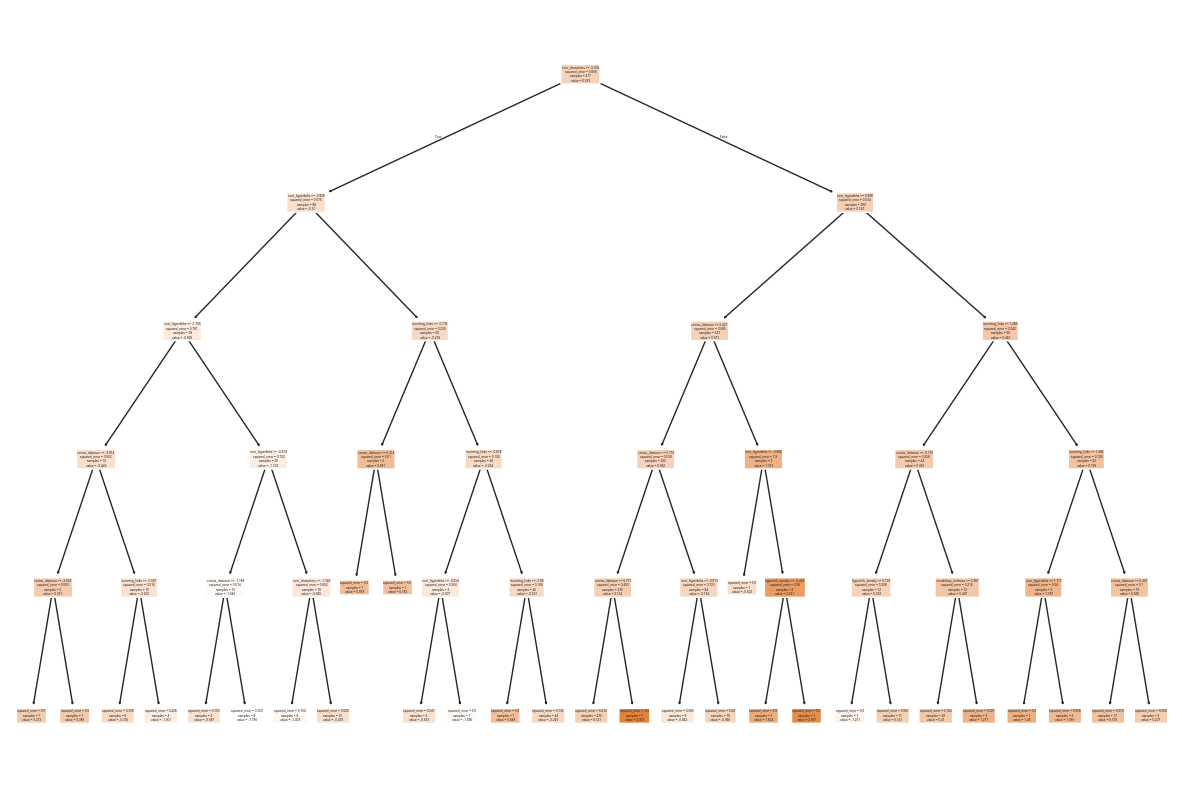

In [105]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))  
plot_tree(tree, feature_names = train_features_1_df.columns.tolist(), filled=True, rounded=True)
plt.show()

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(tree, test_features_1_df)
shap_values = explainer(test_features_1_df)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, test_features_1_df)

### Decision tree for composite score 2

In [106]:
# Instantiate the Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model
tree.fit(train_features_2_df, train_targets_2_df)

# Predict on the test set
y_pred = tree.predict(test_features_2_df)

# Evaluate the performance
mse = mean_squared_error(test_targets_2_df, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature Importance
importances = tree.feature_importances_
for feature, importance in zip(train_features_2_df.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Mean Squared Error: 0.5299107964657085
Feature: incoming_links, Importance: 0.18492726833091236
Feature: num_hyperlinks, Importance: 0.2010261559624207
Feature: num_characters, Importance: 0.3786328583521456
Feature: hyperlink_density, Importance: 0.030995190476328066
Feature: cosine_distance, Importance: 0.16817460042740556
Feature: vocabulary_richness, Importance: 0.036243926450787854


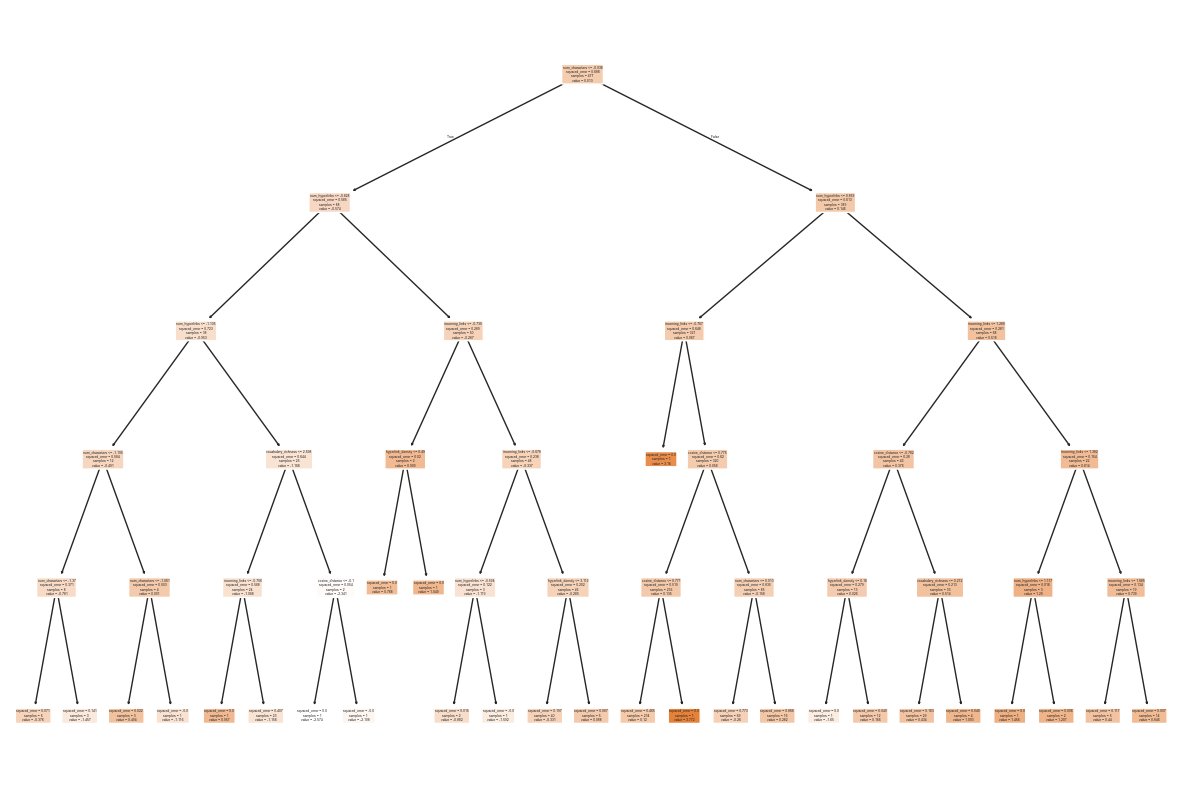

In [107]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))  
plot_tree(tree, feature_names = train_features_2_df.columns.tolist(), filled=True, rounded=True)
plt.show()

In [ ]:
# Create a SHAP explainer
explainer = shap.Explainer(tree, test_features_2_df)
shap_values = explainer(test_features_2_df)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, test_features_2_df)

### Decision tree for PCA composite score 2

In [109]:
# Instantiate the Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model
tree.fit(train_features_3_df, train_targets_3_df)

# Predict on the test set
y_pred = tree.predict(test_features_3_df)

# Evaluate the performance
mse = mean_squared_error(test_targets_3_df, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature Importance
importances = tree.feature_importances_
for feature, importance in zip(train_features_3_df.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Mean Squared Error: 1.2495857801118386
Feature: incoming_links, Importance: 0.14497907456486553
Feature: num_hyperlinks, Importance: 0.17929532345568683
Feature: num_characters, Importance: 0.3404004938257503
Feature: hyperlink_density, Importance: 0.09306607051602034
Feature: cosine_distance, Importance: 0.18266177286017177
Feature: vocabulary_richness, Importance: 0.05959726477750509


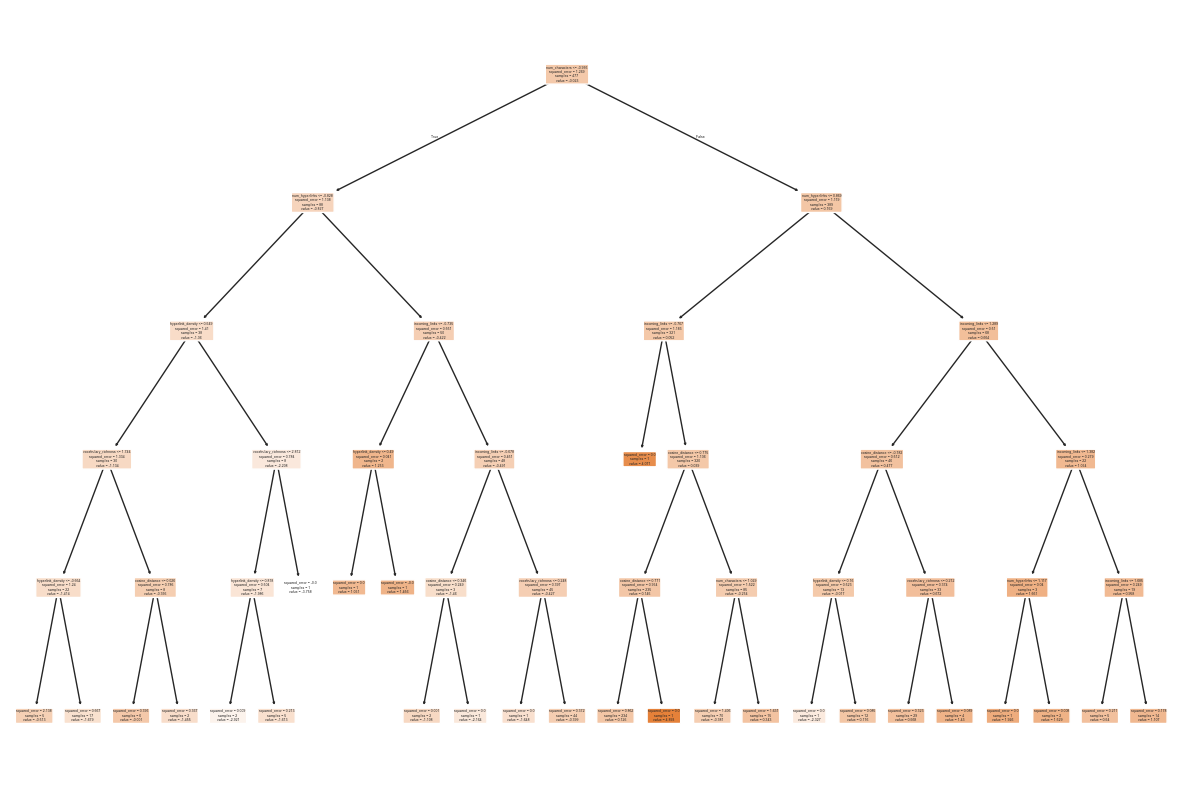

In [110]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))  
plot_tree(tree, feature_names = train_features_3_df.columns.tolist(), filled=True, rounded=True)
plt.show()

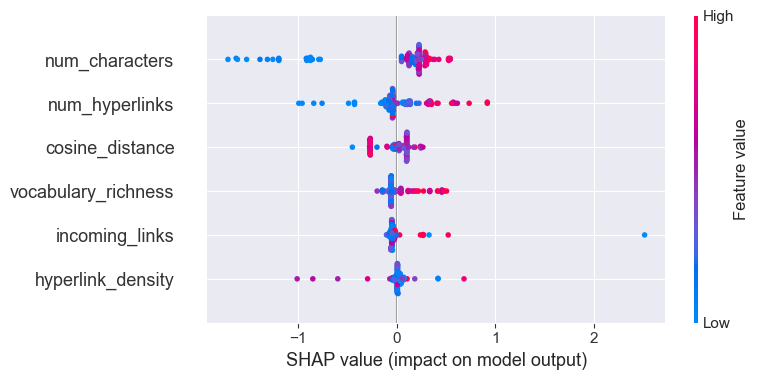

In [128]:
# Create a SHAP explainer
explainer = shap.Explainer(tree, test_features_3_df)
shap_values = explainer(test_features_3_df)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, test_features_3_df)

it seems that the 2 most important attributes with regard to our quality metrics are the number of hyperlinks in the article and the length of the article. with the composite score 3 number of hyperlinks has the highest importance amongst the attributes and for composite score 2 and PCA composite 2 the length is the most important article. hyperlink density and vocabulary richness have the smallest importance for the 3 scores implying that those features are not important when looking for efficient navigation.


## Now let's see the results with gradient boosting

In [123]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(XGBRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_features_2_df, train_targets_2_df)
print(grid_search.best_params_)
best_params = grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


               Feature  Importance
2       num_characters    0.349516
1       num_hyperlinks    0.183808
3    hyperlink_density    0.136183
0       incoming_links    0.124430
5  vocabulary_richness    0.107347
4      cosine_distance    0.098715


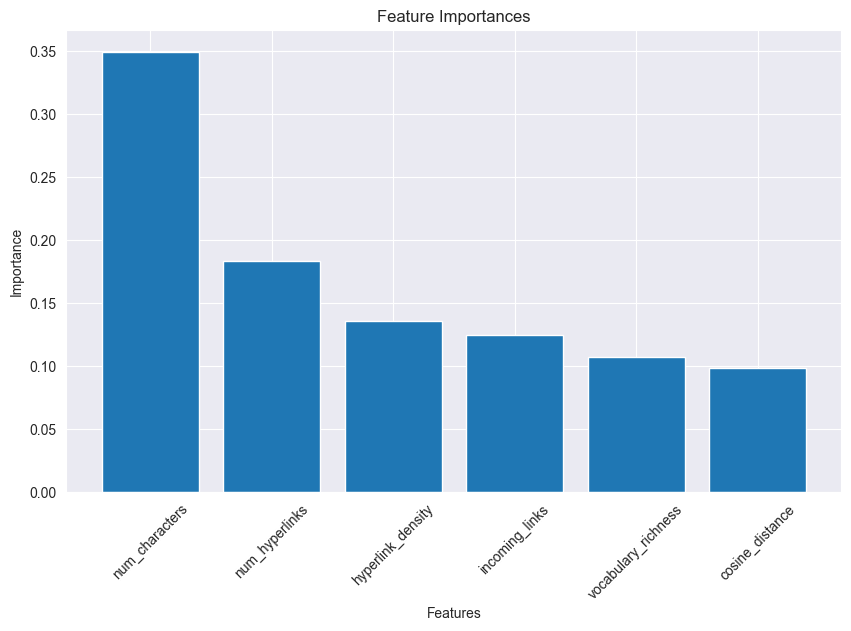

Mean Squared Error (MSE): 0.39
R-squared (R²): 0.07


In [124]:
# Train an XGBoost Regressor
xgb = XGBRegressor(**best_params)
xgb.fit(train_features_1_df, train_targets_1_df)
y_pred = xgb.predict(test_features_1_df)

# Get feature importances
feature_importances = xgb.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': train_features_1_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the importance scores
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

mse = mean_squared_error(test_targets_1_df, y_pred)
r2 = r2_score(test_targets_1_df, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

               Feature  Importance
1       num_hyperlinks    0.232769
2       num_characters    0.226511
3    hyperlink_density    0.153633
4      cosine_distance    0.137363
5  vocabulary_richness    0.134692
0       incoming_links    0.115032


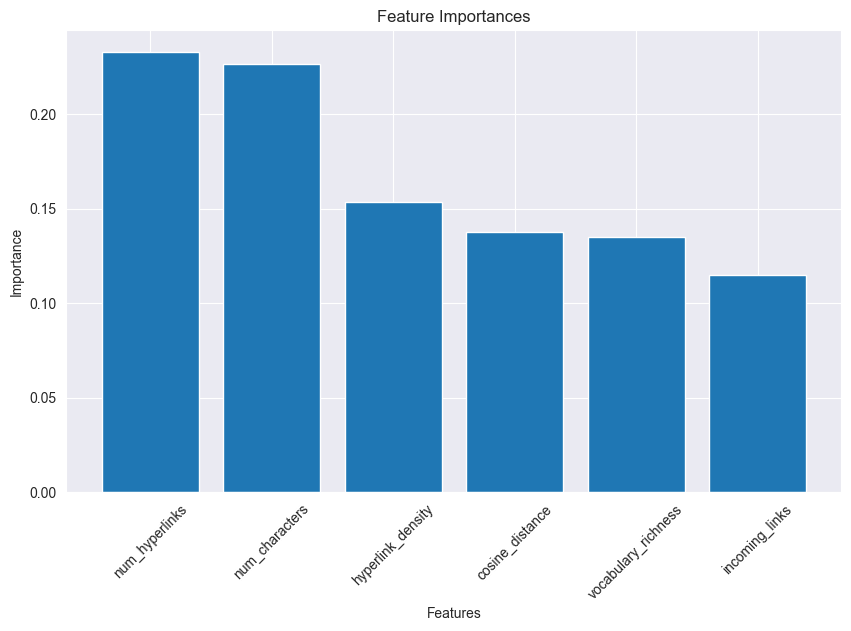

Mean Squared Error (MSE): 0.59
R-squared (R²): -0.13


In [125]:
# Train an XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(train_features_2_df, train_targets_2_df)
y_pred = xgb.predict(test_features_2_df)

# Get feature importances
feature_importances = xgb.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': train_features_2_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the importance scores
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

mse = mean_squared_error(test_targets_2_df, y_pred)
r2 = r2_score(test_targets_2_df, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

               Feature  Importance
2       num_characters    0.281487
1       num_hyperlinks    0.195685
3    hyperlink_density    0.144111
4      cosine_distance    0.139109
5  vocabulary_richness    0.121131
0       incoming_links    0.118477


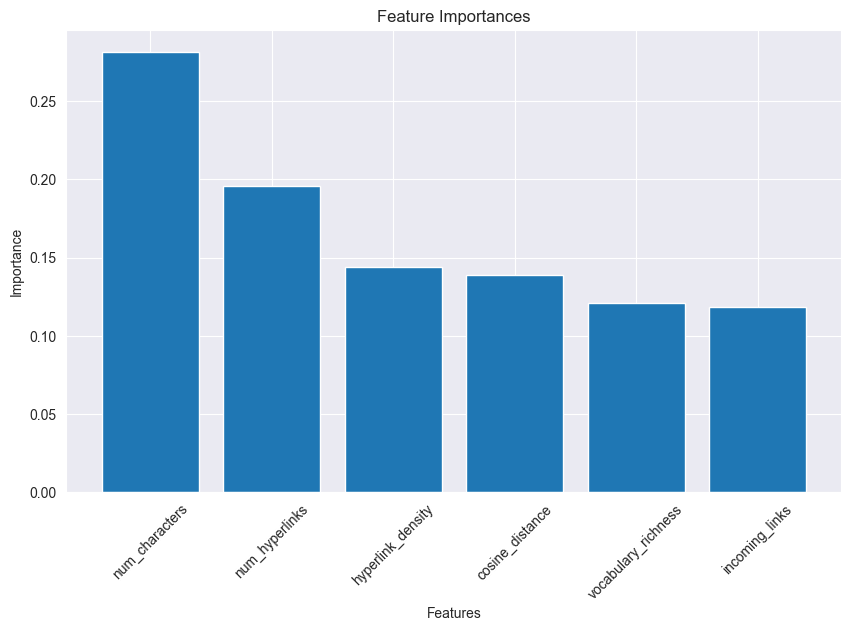

Mean Squared Error (MSE): 1.05
R-squared (R²): -0.09


In [126]:
# Train an XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(train_features_3_df, train_targets_3_df)
y_pred = xgb.predict(test_features_3_df)

# Get feature importances
feature_importances = xgb.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': train_features_3_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the importance scores
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

mse = mean_squared_error(test_targets_3_df, y_pred)
r2 = r2_score(test_targets_3_df, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

We get an R2 very close to 0 which means that the model is performing no better than a baseline model... 

## Evaluation of the utility scores


In [129]:
merged_utility_df

,article,incoming_links,num_hyperlinks,num_characters,hyperlink_density,cosine_distance,vocabulary_richness,composite_3,composite_2
0,12th_century,85,45,6639,0.006778,0.552546,0.542683,0.134965,0.102987
1,14th_century,71,31,5846,0.005303,0.642323,0.549539,0.008924,-0.082867
2,15th_century,100,57,8631,0.006604,0.567696,0.485915,-0.305477,-0.082625
3,16th_century,125,91,13496,0.006743,0.634037,0.456978,0.047422,-0.062574
4,17th_century,127,87,14040,0.006197,0.626604,0.458161,-0.405628,-0.546536
...,...,...,...,...,...,...,...,...,...
592,World_War_I,404,82,81563,0.001005,0.654659,0.243804,0.229561,0.186550
593,World_War_II,751,119,101666,0.001170,0.676675,0.190506,2.534867,2.834866
594,World_Wide_Web,21,20,23063,0.000867,0.693792,0.307097,0.472054,0.334554
595,Yellowstone_National_Park,18,29,30425,0.000953,0.764845,0.305835,-1.607536,-1.572061
